In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [2]:
df = pd.read_excel("C:\\Users\\ivonnics\\Documents\\JOSE LUIS\\Cursos Cursera\\Machine Learning\\Sample - Superstore.xls")

In [3]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
df.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.248,3,0.2,4.1028
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,0.0,15.6332
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,0.2,19.3932
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200
9993,9994,CA-2017-119914,2017-05-04,2017-05-09,Second Class,CC-12220,Chris Cortes,Consumer,United States,Westminster,...,92683,West,OFF-AP-10002684,Office Supplies,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",243.160,2,0.0,72.9480


In [5]:
df.shape

(9994, 21)

In [6]:
df.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

In [7]:
df.values

array([[1, 'CA-2016-152156', Timestamp('2016-11-08 00:00:00'), ..., 2,
        0.0, 41.9136],
       [2, 'CA-2016-152156', Timestamp('2016-11-08 00:00:00'), ..., 3,
        0.0, 219.58199999999997],
       [3, 'CA-2016-138688', Timestamp('2016-06-12 00:00:00'), ..., 2,
        0.0, 6.8713999999999995],
       ...,
       [9992, 'CA-2017-121258', Timestamp('2017-02-26 00:00:00'), ..., 2,
        0.2, 19.393200000000007],
       [9993, 'CA-2017-121258', Timestamp('2017-02-26 00:00:00'), ..., 4,
        0.0, 13.32],
       [9994, 'CA-2017-119914', Timestamp('2017-05-04 00:00:00'), ..., 2,
        0.0, 72.94799999999998]], dtype=object)

In [8]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [9]:
df.groupby('Category').size().sort_values(ascending=False)

Category
Office Supplies    6026
Furniture          2121
Technology         1847
dtype: int64

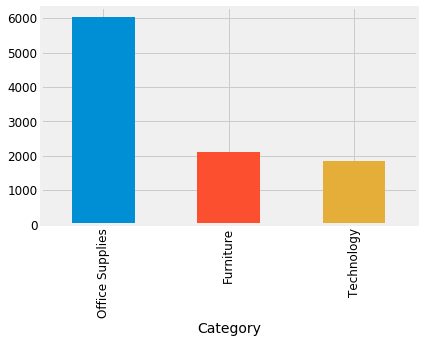

In [10]:
df.groupby('Category').size().sort_values(ascending=False).plot.bar()

In [11]:
df.groupby('Region').size().sort_values(ascending=False)

Region
West       3203
East       2848
Central    2323
South      1620
dtype: int64

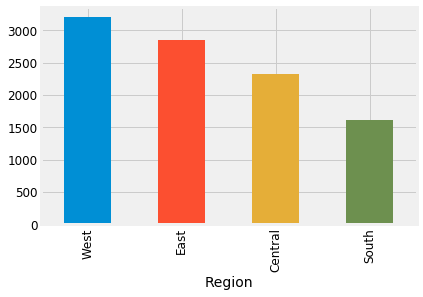

In [12]:
df.groupby('Region').size().sort_values(ascending=False).plot.bar()

In [13]:
df.groupby('State').size().sort_values(ascending=False)

State
California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Virginia                 224
Arizona                  224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Missouri                  66
Oklahoma                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Mississippi               53
Utah                      53
Louisiana                 42
South Carolina            42
Nevada  

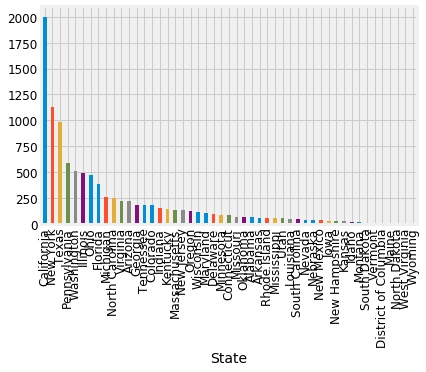

In [14]:
df.groupby('State').size().sort_values(ascending=False).plot.bar()

In [15]:
df.groupby('Segment').size().sort_values(ascending=False)

Segment
Consumer       5191
Corporate      3020
Home Office    1783
dtype: int64

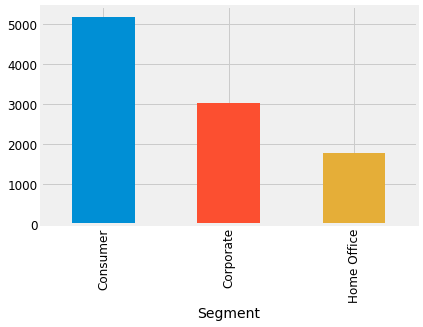

In [16]:
df.groupby('Segment').size().sort_values(ascending=False).plot.bar()

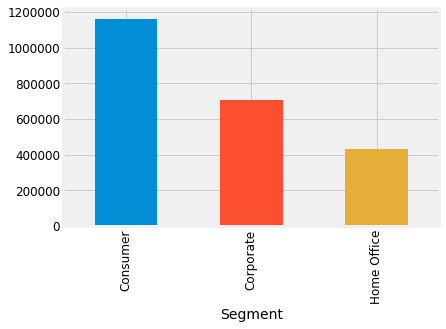

In [17]:
df.groupby('Segment').Sales.sum().plot.bar()

In [18]:
df.groupby('Customer Name').size().sort_values(ascending=False)[:11]

Customer Name
William Brown          37
Matt Abelman           34
John Lee               34
Paul Prost             34
Seth Vernon            32
Jonathan Doherty       32
Chloris Kastensmidt    32
Edward Hooks           32
Emily Phan             31
Arthur Prichep         31
Zuschuss Carroll       31
dtype: int64

In [19]:
df.groupby('Customer Name').Sales.mean().sort_values(ascending=False)[:11]

Customer Name
Mitch Willingham        1751.292000
Sean Miller             1669.536667
Tamara Chand            1587.684833
Grant Thornton          1558.535333
Tom Ashbrook            1459.562000
Hunter Lopez            1170.299818
Bill Shonely            1166.850333
Christopher Conant      1102.642909
Stefanie Holloman       1048.196000
Christopher Martinez     895.402000
Jocasta Rupert           863.880000
Name: Sales, dtype: float64

In [20]:
df.rename(columns={'Customer Name': 'Customer_Name'},inplace=True)
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer_Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [21]:
df[df.Customer_Name == 'William Brown'].Sales.sum()

6160.102000000001

In [22]:
df[df.Customer_Name == 'Mitch Willingham'].Sales.sum()

5253.876

In [23]:
df.groupby('Customer_Name').Sales.agg(['count','mean','sum']).sort_values('count',ascending=False)[:11]

,count,mean,sum
Customer_Name,,,
William Brown,37,166.489243,6160.1020
Matt Abelman,34,126.445912,4299.1610
John Lee,34,288.233029,9799.9230
Paul Prost,34,213.312000,7252.6080
Edward Hooks,32,322.215000,10310.8800
Chloris Kastensmidt,32,98.589219,3154.8550
Seth Vernon,32,358.467187,11470.9500
Jonathan Doherty,32,237.839500,7610.8640
Zuschuss Carroll,31,258.893774,8025.7070


In [24]:
df.groupby('Customer_Name').Sales.agg(['count','mean','sum']).sort_values('sum',ascending=False)[:11]

,count,mean,sum
Customer_Name,,,
Sean Miller,15,1669.536667,25043.050
Tamara Chand,12,1587.684833,19052.218
Raymond Buch,18,839.852167,15117.339
Tom Ashbrook,10,1459.562000,14595.620
Adrian Barton,20,723.678550,14473.571
Ken Lonsdale,29,488.801000,14175.229
Sanjit Chand,22,642.833364,14142.334
Hunter Lopez,11,1170.299818,12873.298
Sanjit Engle,19,642.602000,12209.438


In [25]:
df.groupby('Customer_Name').Sales.agg(['count','mean','sum']).sort_values('mean',ascending=False)[:11]

,count,mean,sum
Customer_Name,,,
Mitch Willingham,3,1751.292000,5253.876
Sean Miller,15,1669.536667,25043.050
Tamara Chand,12,1587.684833,19052.218
Grant Thornton,6,1558.535333,9351.212
Tom Ashbrook,10,1459.562000,14595.620
Hunter Lopez,11,1170.299818,12873.298
Bill Shonely,9,1166.850333,10501.653
Christopher Conant,11,1102.642909,12129.072
Stefanie Holloman,2,1048.196000,2096.392


In [26]:
df.groupby('Customer_Name').Sales.agg(['count','max', 'mean','sum']).sort_values('max',ascending=False)[:11]

,count,max,mean,sum
Customer_Name,,,,
Sean Miller,15,22638.480,1669.536667,25043.050
Tamara Chand,12,17499.950,1587.684833,19052.218
Raymond Buch,18,13999.960,839.852167,15117.339
Tom Ashbrook,10,11199.968,1459.562000,14595.620
Hunter Lopez,11,10499.970,1170.299818,12873.298
Adrian Barton,20,9892.740,723.678550,14473.571
Sanjit Chand,22,9449.950,642.833364,14142.334
Bill Shonely,9,9099.930,1166.850333,10501.653
Sanjit Engle,19,8749.950,642.602000,12209.438


In [27]:
df.groupby('Customer_Name').Sales.agg(['count','max', 'mean','sum']).sort_values('max',ascending=False)[:11]

,count,max,mean,sum
Customer_Name,,,,
Sean Miller,15,22638.480,1669.536667,25043.050
Tamara Chand,12,17499.950,1587.684833,19052.218
Raymond Buch,18,13999.960,839.852167,15117.339
Tom Ashbrook,10,11199.968,1459.562000,14595.620
Hunter Lopez,11,10499.970,1170.299818,12873.298
Adrian Barton,20,9892.740,723.678550,14473.571
Sanjit Chand,22,9449.950,642.833364,14142.334
Bill Shonely,9,9099.930,1166.850333,10501.653
Sanjit Engle,19,8749.950,642.602000,12209.438


In [28]:
df.groupby('Region').Sales.agg(['count','max', 'mean','sum']).sort_values('sum',ascending=False)[:11]

,count,max,mean,sum
Region,,,,
West,3203,13999.960,226.493233,725457.8245
East,2848,11199.968,238.336110,678781.2400
Central,2323,17499.950,215.772661,501239.8908
South,1620,22638.480,241.803645,391721.9050


In [29]:
df.groupby('Segment').Sales.agg(['count','max','mean','sum']).sort_values('sum',ascending=False)[:11]

,count,max,mean,sum
Segment,,,,
Consumer,5191,13999.96,223.733644,1.161401e+06
Corporate,3020,17499.95,233.823300,7.061464e+05
Home Office,1783,22638.48,240.972041,4.296531e+05


In [30]:
df.groupby('Category').Sales.agg(['count','max','mean','sum']).sort_values('sum',ascending=False)[:11]

,count,max,mean,sum
Category,,,,
Technology,1847,22638.480,452.709276,836154.0330
Furniture,2121,4416.174,349.834887,741999.7953
Office Supplies,6026,9892.740,119.324101,719047.0320


In [31]:
df.groupby('Sub-Category').Sales.agg(['count','max','mean','sum']).sort_values('sum',ascending=False)[:11]

,count,max,mean,sum
Sub-Category,,,,
Phones,889,4548.810,371.211534,330007.0540
Chairs,617,4416.174,532.332420,328449.1030
Storage,846,2934.330,264.590553,223843.6080
Tables,319,4297.644,648.794771,206965.5320
Binders,1523,9892.740,133.560560,203412.7330
Machines,115,22638.480,1645.553313,189238.6310
Accessories,775,3347.370,215.974604,167380.3180
Copiers,68,17499.950,2198.941618,149528.0300
Bookcases,228,4404.900,503.859633,114879.9963


In [32]:
df.groupby(['Category','Sub-Category']).Sales.agg(['count','max','mean','sum']).sort_values('sum',ascending=False)[:11]

count        max         mean          sum
Category        Sub-Category                                            
Technology      Phones          889   4548.810   371.211534  330007.0540
Furniture       Chairs          617   4416.174   532.332420  328449.1030
Office Supplies Storage         846   2934.330   264.590553  223843.6080
Furniture       Tables          319   4297.644   648.794771  206965.5320
Office Supplies Binders        1523   9892.740   133.560560  203412.7330
Technology      Machines        115  22638.480  1645.553313  189238.6310
                Accessories     775   3347.370   215.974604  167380.3180
                Copiers          68  17499.950  2198.941618  149528.0300
Furniture       Bookcases       228   4404.900   503.859633  114879.9963
Office Supplies Appliances      466   2625.120   230.755710  107532.1610
Furniture       Furnishings     957   1336.440    95.825668   91705.1640

In [33]:
df.groupby(['Category','Sub-Category','Segment']).Sales.agg(['count','max','mean','sum']).sort_values('sum',ascending=False)[:11]

count       max         mean  \
Category        Sub-Category Segment                                   
Furniture       Chairs       Consumer     329  4416.174   525.418669   
Technology      Phones       Consumer     451  4548.810   376.791051   
Office Supplies Binders      Consumer     780  9892.740   151.488473   
                Storage      Consumer     450  1801.632   223.316449   
Furniture       Tables       Consumer     159  4297.644   628.514434   
                Chairs       Corporate    188  3504.900   527.345096   
Technology      Phones       Corporate    272  3499.930   335.122846   
                Accessories  Consumer     408  3347.370   213.493230   
Office Supplies Storage      Corporate    260  2934.330   306.888454   
Technology      Machines     Consumer      57  8749.950  1395.488158   
Furniture       Tables       Corporate    106  3393.680   668.601108   

                                                sum  
Category        Sub-Category Segment                 
Furniture       Chairs       Consumer   172862.7420  
Technology      Phones       Consumer   169932.7640  
Office Supplies Binders      Consumer   118161.0090  
                Storage      Consumer   100492.4020  
Furniture       Tables       Consumer    99933.7950  
                Chairs       Corporate   99140.8780  
Technology      Phones       Corporate   91153.4140  
                Accessories  Consumer    87105.2380  
Office Supplies Storage      Corporate   79790.9980  
Technology      Machines     Consumer    79542.8250  
Furniture       Tables       Corporate   70871.7175

In [34]:
df.groupby(['Category','Sub-Category','Segment','Product ID']).Sales.agg(['count','max','mean','sum']).sort_values('sum',ascending=False)[:21]

count        max  \
Category        Sub-Category Segment     Product ID                          
Technology      Copiers      Consumer    TEC-CO-10004722      3  13999.960   
                Machines     Home Office TEC-MA-10002412      1  22638.480   
                             Consumer    TEC-MA-10001127      3   8749.950   
                Copiers      Corporate   TEC-CO-10004722      1  17499.950   
Furniture       Chairs       Consumer    FUR-CH-10002024      6   4416.174   
Office Supplies Binders      Consumer    OFF-BI-10000545      7   9892.740   
                                         OFF-BI-10003527      5   6354.950   
Technology      Machines     Corporate   TEC-MA-10001047      2   9099.930   
Office Supplies Binders      Consumer    OFF-BI-10001359      7   4305.552   
Furniture       Bookcases    Consumer    FUR-BO-10002213     10   4007.840   
Office Supplies Supplies     Consumer    OFF-SU-10000151      2   8187.650   
                Binders      Consumer    OFF-BI-10004995      4   5443.960   
Technology      Copiers      Home Office TEC-CO-10004722      1  11199.968   
                Phones       Consumer    TEC-PH-10001459      4   4367.896   
Furniture       Bookcases    Consumer    FUR-BO-10004834      3   4228.704   
Office Supplies Binders      Consumer    OFF-BI-10001120      1   9449.950   
Technology      Copiers      Home Office TEC-CO-10001449      3   5399.910   
Office Supplies Supplies     Consumer    OFF-SU-10002881      4   4663.736   
                             Corporate   OFF-SU-10002881      2   4164.050   
Technology      Machines     Consumer    TEC-MA-10000822      1   8159.952   
                             Corporate   TEC-MA-10004125      1   7999.980   

                                                                  mean  \
Category        Sub-Category Segment     Product ID                      
Technology      Copiers      Consumer    TEC-CO-10004722  10966.635333   
                Machines     Home Office TEC-MA-10002412  22638.480000   
                             Consumer    TEC-MA-10001127   6124.965000   
                Copiers      Corporate   TEC-CO-10004722  17499.950000   
Furniture       Chairs       Consumer    FUR-CH-10002024   2897.384000   
Office Supplies Binders      Consumer    OFF-BI-10000545   2446.007143   
                                         OFF-BI-10003527   2897.857200   
Technology      Machines     Corporate   TEC-MA-10001047   7149.945000   
Office Supplies Binders      Consumer    OFF-BI-10001359   1870.864857   
Furniture       Bookcases    Consumer    FUR-BO-10002213   1292.164300   
Office Supplies Supplies     Consumer    OFF-SU-10000151   6058.861000   
                Binders      Consumer    OFF-BI-10004995   2994.178000   
Technology      Copiers      Home Office TEC-CO-10004722  11199.968000   
                Phones       Consumer    TEC-PH-10001459   2561.939000   
Furniture       Bookcases    Consumer    FUR-BO-10004834   3236.133200   
Office Supplies Binders      Consumer    OFF-BI-10001120   9449.950000   
Technology      Copiers      Home Office TEC-CO-10001449   3079.948667   
Office Supplies Supplies     Consumer    OFF-SU-10002881   2082.025000   
                             Corporate   OFF-SU-10002881   4164.050000   
Technology      Machines     Consumer    TEC-MA-10000822   8159.952000   
                             Corporate   TEC-MA-10004125   7999.980000   

                                                                 sum  
Category        Sub-Category Segment     Product ID                   
Technology      Copiers      Consumer    TEC-CO-10004722  32899.9060  
                Machines     Home Office TEC-MA-10002412  22638.4800  
                             Consumer    TEC-MA-10001127  18374.8950  
                Copiers      Corporate   TEC-CO-10004722  17499.9500  
Furniture       Chairs       Consumer    FUR-CH-10002024  17384.3040  
Office Supplies Binders      Consumer    OFF-BI-10000545  17122

In [35]:
df1=df.groupby('Product ID').Sales.agg(['count','max','mean','sum']).sort_values('sum',ascending=False)[:11]
df1

,count,max,mean,sum
Product ID,,,,
TEC-CO-10004722,5,17499.950,12319.964800,61599.824
OFF-BI-10003527,10,6354.950,2745.338400,27453.384
TEC-MA-10002412,1,22638.480,22638.480000,22638.480
FUR-CH-10002024,8,4416.174,2733.822000,21870.576
OFF-BI-10001359,11,4305.552,1802.134455,19823.479
OFF-BI-10000545,9,9892.740,2113.833333,19024.500
TEC-CO-10001449,8,5399.910,2354.960750,18839.686
TEC-MA-10001127,3,8749.950,6124.965000,18374.895
OFF-BI-10004995,6,5443.960,2994.178000,17965.068


In [36]:
df1.sum(axis = 0, skipna = True) 

count        68.000000
max      101049.268000
mean      65711.922655
sum      261450.105000
dtype: float64

In [37]:
df.nunique()

Row ID           9994
Order ID         5009
Order Date       1237
Ship Date        1334
Ship Mode           4
Customer ID       793
Customer_Name     793
Segment             3
Country             1
City              531
State              49
Postal Code       631
Region              4
Product ID       1862
Category            3
Sub-Category       17
Product Name     1850
Sales            6144
Quantity           14
Discount           12
Profit           7545
dtype: int64

In [38]:
df.groupby('State').count().sort_values('Sales',ascending=False)[:11]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer_Name,Segment,Country,City,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
State,,,,,,,,,,,,,,,,,,,,
California,2001,2001,2001,2001,2001,2001,2001,2001,2001,2001,2001,2001,2001,2001,2001,2001,2001,2001,2001,2001
New York,1128,1128,1128,1128,1128,1128,1128,1128,1128,1128,1128,1128,1128,1128,1128,1128,1128,1128,1128,1128
Texas,985,985,985,985,985,985,985,985,985,985,985,985,985,985,985,985,985,985,985,985
Pennsylvania,587,587,587,587,587,587,587,587,587,587,587,587,587,587,587,587,587,587,587,587
Washington,506,506,506,506,506,506,506,506,506,506,506,506,506,506,506,506,506,506,506,506
Illinois,492,492,492,492,492,492,492,492,492,492,492,492,492,492,492,492,492,492,492,492
Ohio,469,469,469,469,469,469,469,469,469,469,469,469,469,469,469,469,469,469,469,469
Florida,383,383,383,383,383,383,383,383,383,383,383,383,383,383,383,383,383,383,383,383
Michigan,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255


In [39]:
df.groupby('State').sum().sort_values('Sales',ascending=False)[:11]

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
State,,,,,,
California,10137449,184382639,457687.6315,7667,145.60,76381.3871
New York,5452096,11835721,310876.2710,4224,62.40,74038.5486
Texas,5085541,75747693,170188.0458,3724,364.64,-25729.3563
Washington,2584458,49661687,138641.2700,1883,32.40,33402.6517
Pennsylvania,2768523,11190565,116511.9140,2153,192.90,-15559.9603
Florida,1958255,12640225,89473.7080,1379,114.65,-3399.3017
Illinois,2571481,29873772,80166.1010,1845,191.90,-12607.8870
Ohio,2355994,20579836,78258.1360,1759,152.40,-16971.3766
Michigan,1200167,12356103,76269.6140,946,1.80,24463.1876


In [40]:
df.groupby('City').sum().sort_values('Sales',ascending=False)[:11]

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
City,,,,,,
New York City,4450928,9168909,256368.1610,3417,51.40,62036.9837
Los Angeles,3785302,67252887,175851.3410,2879,55.50,30440.7579
Seattle,2199185,41989758,119540.7420,1590,27.80,29156.0967
San Francisco,2462471,47998395,112669.0920,1935,34.00,17507.3854
Philadelphia,2531454,10275302,109077.0130,1981,175.50,-13837.7674
Houston,2017125,29052387,64504.7604,1466,143.14,-10153.5485
Chicago,1643465,19037248,48539.5410,1132,120.50,-6654.5688
San Diego,827518,15650880,47521.0290,670,13.60,6377.1960
Jacksonville,599775,3843200,44713.1830,429,35.85,-2323.8350


In [41]:
df.sum(axis = 0, skipna = True) 

Row ID                                                    49945015
Order ID         CA-2016-152156CA-2016-152156CA-2016-138688US-2...
Ship Mode        Second ClassSecond ClassSecond ClassStandard C...
Customer ID      CG-12520CG-12520DV-13045SO-20335SO-20335BH-117...
Customer_Name    Claire GuteClaire GuteDarrin Van HuffSean O'Do...
Segment          ConsumerConsumerCorporateConsumerConsumerConsu...
Country          United StatesUnited StatesUnited StatesUnited ...
City             HendersonHendersonLos AngelesFort LauderdaleFo...
State            KentuckyKentuckyCaliforniaFloridaFloridaCalifo...
Postal Code                                              551572652
Region           SouthSouthWestSouthSouthWestWestWestWestWestWe...
Product ID       FUR-BO-10001798FUR-CH-10000454OFF-LA-10000240F...
Category         FurnitureFurnitureOffice SuppliesFurnitureOffi...
Sub-Category     BookcasesChairsLabelsTablesStorageFurnishingsA...
Product Name     Bush Somerset Collection BookcaseHon Deluxe F

In [42]:
Total_Sales=df.Sales.sum(axis = 0, skipna = True) 
print('Total Sales (in KUSD) is: {:.0f}'.format(Total_Sales/1000))

Total Sales (in KUSD) is: 2297


In [43]:
Costs=df.Sales.sum(axis = 0, skipna = True) - df.Profit.sum(axis = 0, skipna = True) 
print('Cost of Goods Sold is (in KUSD): {:.0f}'.format(Costs/1000))

Cost of Goods Sold is (in KUSD): 2011


In [44]:
Total_profit=df.Profit.sum(axis = 0, skipna = True) 
Margin_percent=df.Profit.sum(axis = 0, skipna = True)/df.Sales.sum(axis = 0, skipna = True) 
print('Profit (in KUSD) is: {:.0f}'.format(Total_profit/1000))
print('Margin (in %) is: {:.2f}'.format(Margin_percent*100))

Profit (in KUSD) is: 286
Margin (in %) is: 12.47


In [45]:
df2=df.groupby('Region').Sales.sum()
df2

Region
Central    501239.8908
East       678781.2400
South      391721.9050
West       725457.8245
Name: Sales, dtype: float64

In [46]:
df2.loc['Central']

501239.8908000005

In [47]:
df2

Region
Central    501239.8908
East       678781.2400
South      391721.9050
West       725457.8245
Name: Sales, dtype: float64

In [48]:
df.groupby(['Order Date','Region']).Sales.agg(['count','max', 'mean','sum']).sort_values('sum',ascending=False)[:11]

,,count,max,mean,sum
Order Date,Region,,,,
2014-03-18,South,7,22638.480,3380.175429,23661.228
2016-10-02,Central,5,17499.950,3667.348000,18336.740
2017-03-23,West,5,13999.960,2859.816000,14299.080
2017-10-22,East,6,11199.968,2296.806333,13780.838
2017-11-17,East,6,10499.970,2011.498333,12068.990
2014-09-08,Central,11,8159.952,1068.890545,11757.796
2015-09-17,East,18,4228.704,630.660111,11351.882
2015-11-08,East,9,4643.800,1148.586222,10337.276
2017-11-04,South,10,7999.980,1031.350400,10313.504


In [49]:
df.loc['2014-1-1':'2014-12-31']

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer_Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit


In [50]:
df3=df.groupby(['Order Date','Region']).Sales.agg(['sum']).sort_values('sum',ascending=False)

In [51]:
df3 = df3.reset_index()

In [52]:
df3.dtypes

Order Date    datetime64[ns]
Region                object
sum                  float64
dtype: object

### 2014

In [53]:
df4=df3[(df3['Order Date'] >= '2014-01-01') & (df3['Order Date'] <= '2014-12-31')]

In [54]:
central2014= df4[(df4['Region'] == 'Central')].sum(skipna=True)
central2014=float(central2014)
central2014

103838.16459999999

In [55]:
east2014= df4[(df4['Region'] == 'East')].sum(skipna=True)
east2014=float(east2014)
east2014

128680.457

In [56]:
west2014= df4[(df4['Region'] == 'West')].sum(skipna=True)
west2014=float(west2014)
west2014

147883.033

In [57]:
south2014= df4[(df4['Region'] == 'South')].sum(skipna=True)
south2014=float(south2014)
south2014

103845.8435

In [58]:
treg2014=[central2014,east2014,south2014,west2014]
treg2014

[103838.16459999999, 128680.457, 103845.8435, 147883.033]

<function matplotlib.pyplot.show(*args, **kw)>

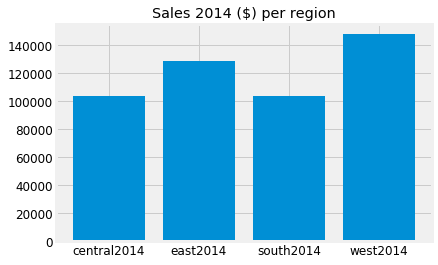

In [59]:
height=np.array(treg2014).T.tolist()
bars=('central2014','east2014','south2014','west2014')
plt.bar(range(len(height)), height,linewidth=1)
plt.xticks(range(len(height)), bars)
plt.title('Sales 2014 ($) per region')
plt.show

### 2015

In [60]:
df4=df3[(df3['Order Date'] >= '2015-01-01') & (df3['Order Date'] <= '2015-12-31')]

In [61]:
central2015= df4[(df4['Region'] == 'Central')].sum(skipna=True)
central2015=float(central2015)
central2015

102874.222

In [62]:
east2015= df4[(df4['Region'] == 'East')].sum(skipna=True)
east2015=float(east2015)
east2015

156332.057

In [63]:
west2015= df4[(df4['Region'] == 'West')].sum(skipna=True)
west2015=float(west2015)
west2015

139966.2495

In [64]:
south2015= df4[(df4['Region'] == 'South')].sum(skipna=True)
south2015=float(south2015)
south2015

71359.98049999999

In [65]:
treg2015=[central2015,east2015,south2015,west2015]
treg2015

[102874.222, 156332.057, 71359.98049999999, 139966.2495]

<function matplotlib.pyplot.show(*args, **kw)>

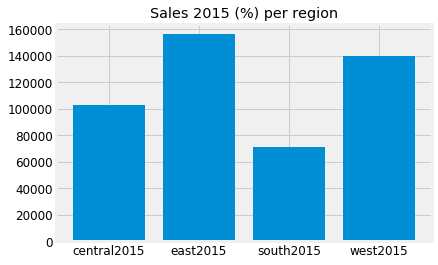

In [66]:
height=np.array(treg2015).T.tolist()
bars=('central2015','east2015','south2015','west2015')
plt.bar(range(len(height)), height,linewidth=1)
plt.xticks(range(len(height)), bars)
plt.title('Sales 2015 (%) per region')
plt.show

### 2016

In [67]:
df4=df3[(df3['Order Date'] >= '2016-01-01') & (df3['Order Date'] <= '2016-12-31')]

In [68]:
central2016= df4[(df4['Region'] == 'Central')].sum(skipna=True)
central2016=float(central2016)
central2016

147429.376

In [69]:
east2016= df4[(df4['Region'] == 'East')].sum(skipna=True)
east2016=float(east2016)
east2016

180685.82200000001

In [70]:
west2016= df4[(df4['Region'] == 'West')].sum(skipna=True)
west2016=float(west2016)
west2016

187480.1765

In [71]:
south2016= df4[(df4['Region'] == 'South')].sum(skipna=True)
south2016=float(south2016)
south2016

93610.22350000001

In [72]:
treg2016=[central2016,east2016,south2016,west2016]
treg2016

[147429.376, 180685.82200000001, 93610.22350000001, 187480.1765]

<function matplotlib.pyplot.show(*args, **kw)>

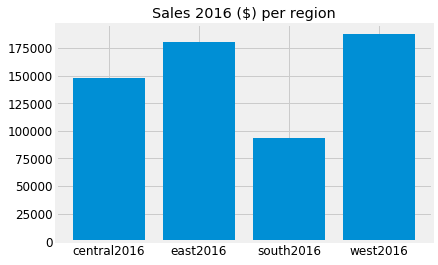

In [73]:
height=np.array(treg2016).T.tolist()
bars=('central2016','east2016','south2016','west2016')
plt.bar(range(len(height)), height,linewidth=1)
plt.xticks(range(len(height)), bars)
plt.title('Sales 2016 ($) per region')
plt.show

### 2017

In [74]:
df4=df3[(df3['Order Date'] >= '2017-01-01') & (df3['Order Date'] <= '2017-12-31')]

In [75]:
central2017= df4[(df4['Region'] == 'Central')].sum(skipna=True)
central2017=float(central2017)
central2017

147098.12819999998

In [76]:
east2017= df4[(df4['Region'] == 'East')].sum(skipna=True)
east2017=float(east2017)
east2017

213082.90399999998

In [77]:
west2017= df4[(df4['Region'] == 'West')].sum(skipna=True)
west2017=float(west2017)
west2017

250128.3655

In [78]:
south2017= df4[(df4['Region'] == 'South')].sum(skipna=True)
south2017=float(south2017)
south2017

122905.8575

In [79]:
treg2017=[central2017,east2017,south2017,west2017]
treg2017

[147098.12819999998, 213082.90399999998, 122905.8575, 250128.3655]

<function matplotlib.pyplot.show(*args, **kw)>

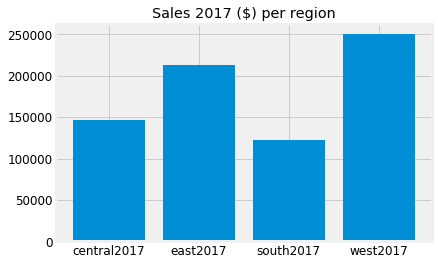

In [80]:
height=np.array(treg2017).T.tolist()
bars=('central2017','east2017','south2017','west2017')
plt.bar(range(len(height)), height,linewidth=1)
plt.xticks(range(len(height)), bars)
plt.title('Sales 2017 ($) per region')
plt.show

### Total por año:

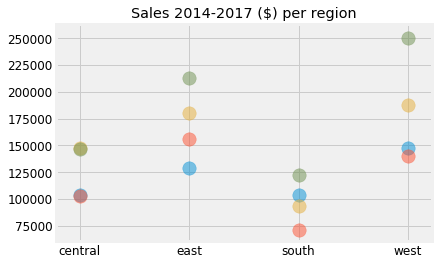

In [84]:
bars=('central','east','south','west')
height1=np.array(treg2014).T.tolist()
height2=np.array(treg2015).T.tolist()
height3=np.array(treg2016).T.tolist()
height4=np.array(treg2017).T.tolist()
plt.scatter(bars, height1, s=180, alpha=0.5)
plt.scatter(bars, height2, s=180, alpha=0.5)
plt.scatter(bars, height3, s=180, alpha=0.5)
plt.scatter(bars, height4, s=180, alpha=0.5)
plt.title('Sales 2014-2017 ($) per region')
plt.show()


   Year      Central        East         West        South
0  2014  103838.1646  128680.457  147883.0330  103845.8435
1  2015  102874.2220  156332.057  139966.2495   71359.9805
2  2016  147429.3760  180685.822  187480.1765   93610.2235
3  2017  147098.1282  213082.904  250128.3655  122905.8575


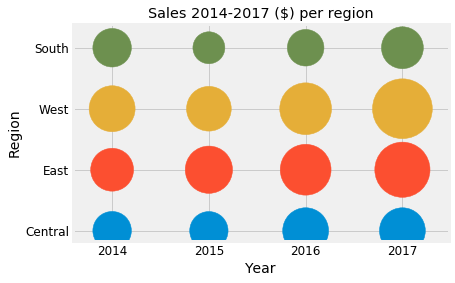

In [87]:
columns = ['Year', 'Central','East', 'West', 'South']
Cuadro = pd.DataFrame(columns=columns)
Cuadro = Cuadro.fillna(0) # with 0s rather than NaNs
#print('Cuadro')
#print(Cuadro)

Cuadro.loc['0'] = pd.Series({'Year': '2014', 'Central':central2014, 'East':east2014, 'West':west2014,
          'South':south2014})
Cuadro.loc['1'] = pd.Series({'Year': '2015', 'Central':central2015, 'East':east2015, 'West':west2015,
          'South':south2015})
Cuadro.loc['2'] = pd.Series({'Year': '2016', 'Central':central2016, 'East':east2016, 'West':west2016,
          'South':south2016})
Cuadro.loc['3'] = pd.Series({'Year': '2017', 'Central':central2017, 'East':east2017, 'West':west2017,
          'South':south2017})

print(Cuadro)


df = Cuadro
fig, ax = plt.subplots()
ax.set(title='Sales 2014-2017 ($) per region')
ax.scatter(df['Year'], ['Central']*4, s=df['Central']/70)
ax.scatter(df['Year'], ['East']*4, s=df['East']/70)
ax.scatter(df['Year'], ['West']*4, s=df['West']/70)
ax.scatter(df['Year'], ['South']*4, s=df['South']/70)
plt.ylabel('Region')
plt.xlabel('Year')
plt.show()